# Scientific Computing Exercise Set 2

**Authors**:  
Mattia Monari, 15744124  
Lorenzo Mainetti, 15546675  
Giorgio Campisano, 14073145

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 14})
savefig = False # Set to True to save plots

## 2.1 DLA


Benchmarking different omega values using DLASimulation:
Omega      Eta        Avg Iterations Std Dev   
----------------------------------------
1.5000     0.00       79.64      59.53     
1.5169     0.00       68.43      53.87     
1.5338     0.00       60.73      50.36     
1.5507     0.00       53.53      47.65     
1.5676     0.00       62.47      44.32     
1.5845     0.00       49.22      40.81     
1.6014     0.00       48.41      38.48     
1.6183     0.00       45.18      37.34     
1.6352     0.00       47.89      34.09     
1.6521     0.00       41.13      34.05     
1.6690     0.00       36.11      29.78     
1.6859     0.00       33.95      27.65     
1.7028     0.00       32.41      27.70     
1.7197     0.00       35.58      23.52     
1.7366     0.00       33.62      22.55     
1.7534     0.00       30.84      19.38     
1.7703     0.00       27.51      19.41     
1.7872     0.00       25.43      16.06     
1.8041     0.00       29.11      14.23     
1.8210     0.00  

Growth Progress for η=0.00: 100%|██████████| 500/500 [00:01<00:00, 350.21it/s]


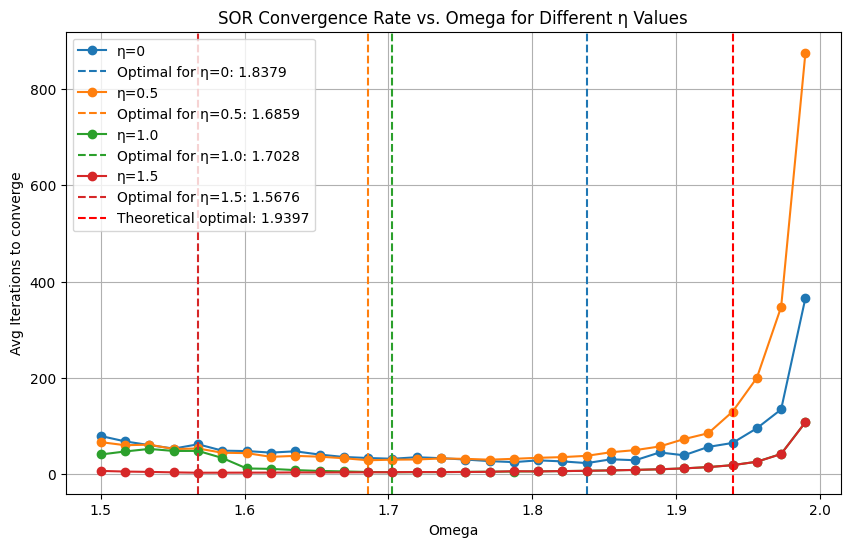

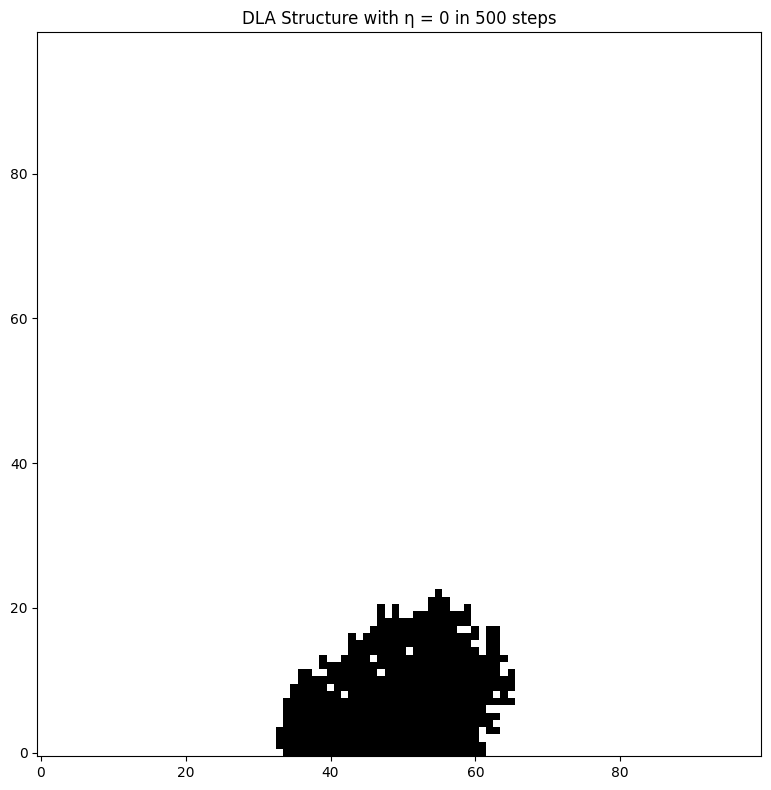

Growth Progress for η=0.50: 100%|██████████| 500/500 [00:01<00:00, 305.90it/s]


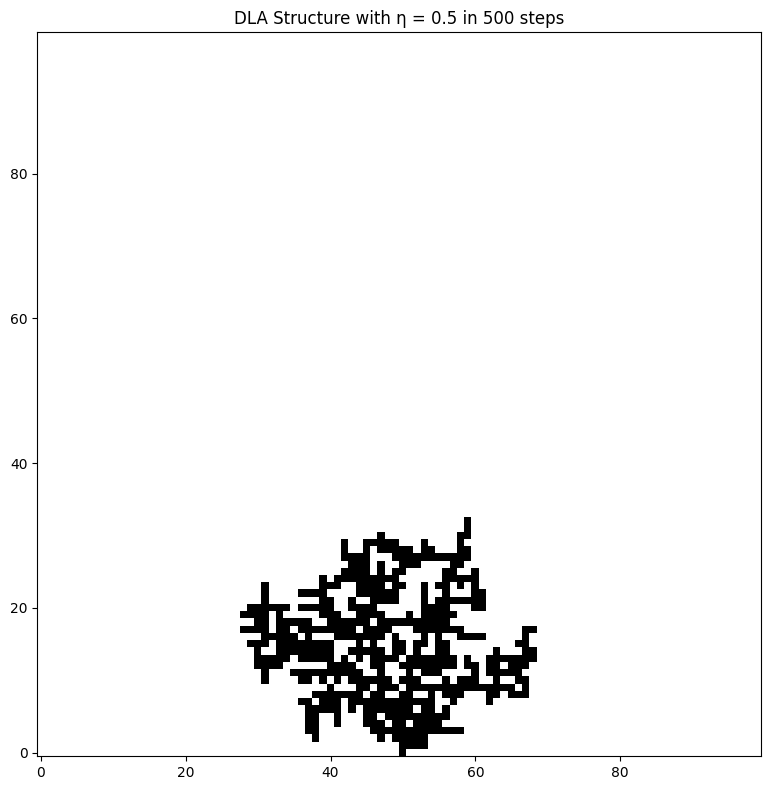

Growth Progress for η=1.00: 100%|██████████| 500/500 [00:01<00:00, 289.27it/s]


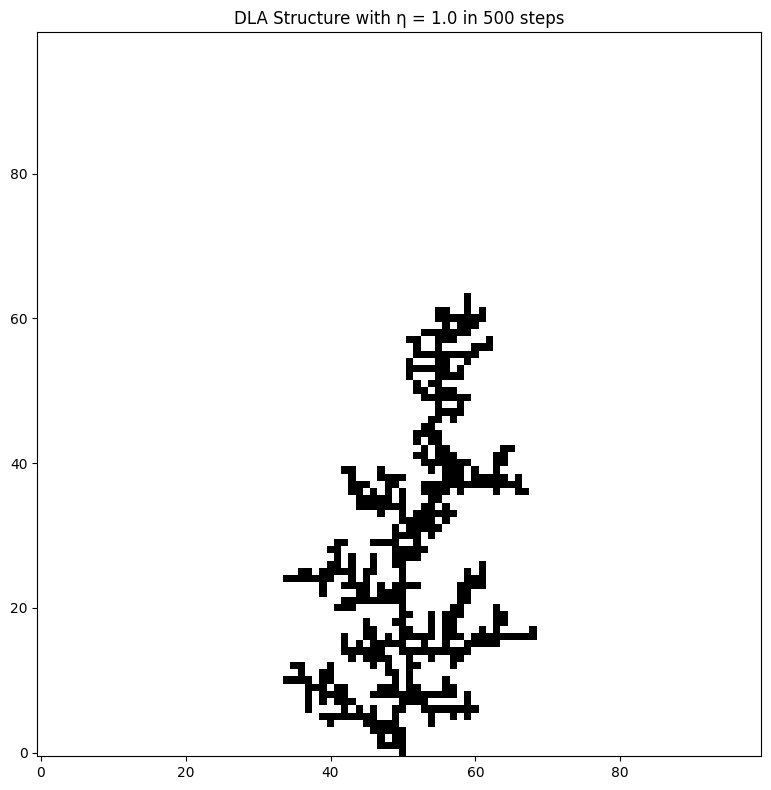

Growth Progress for η=1.50: 100%|██████████| 500/500 [00:01<00:00, 270.64it/s]


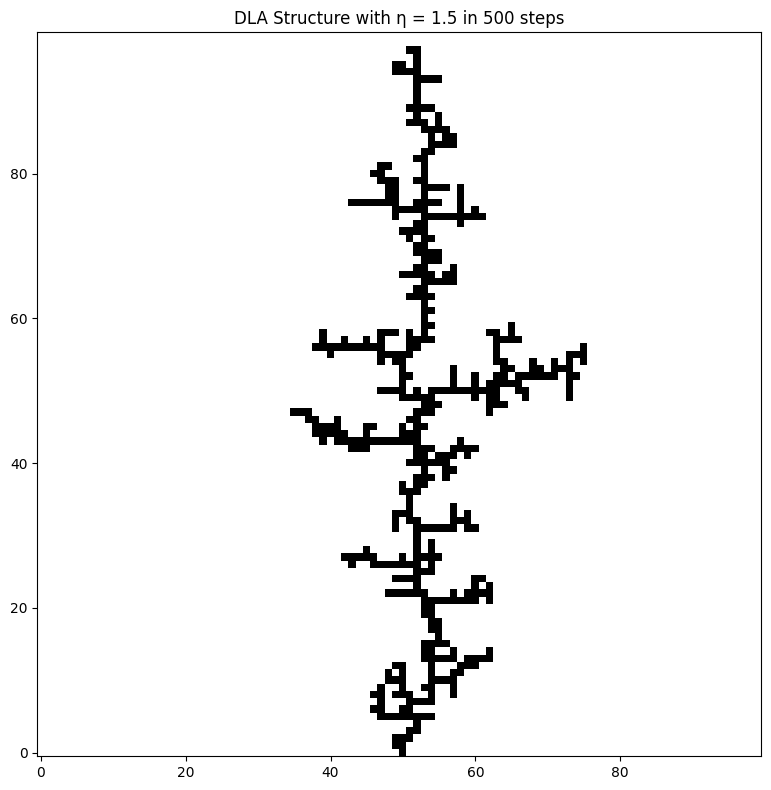

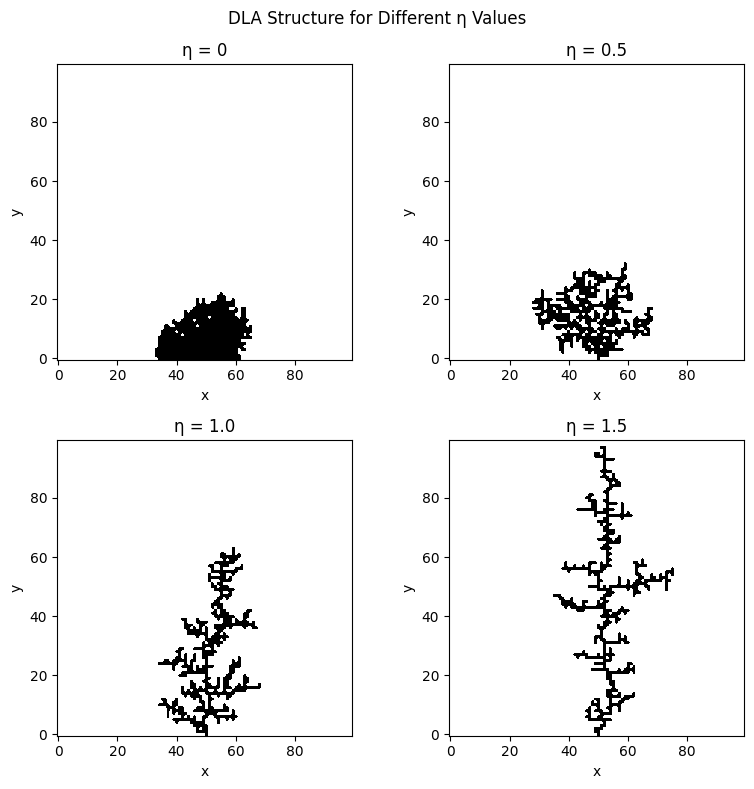


Measuring fractal dimension...


In [ ]:
from dla import run_dla_experiments, find_optimal_omega

# Find optimal omega for SOR
best_omega = find_optimal_omega(size=100, num_omegas=30, etas=[0, 0.5, 1.0, 1.5], savefig=savefig)

# Test different eta values with the optimal omega
print("\nRunning full DLA simulations with optimal omega...")
results = run_dla_experiments(etas=[0, 0.5, 1.0, 1.5], size=100, steps=500, savefig=savefig)

# Measure fractal dimension
print("\nMeasuring fractal dimension...")
for sim in results:
    pass

# 2.2 MC-DLA

100%|██████████| 10000/10000 [00:05<00:00, 1730.57it/s]


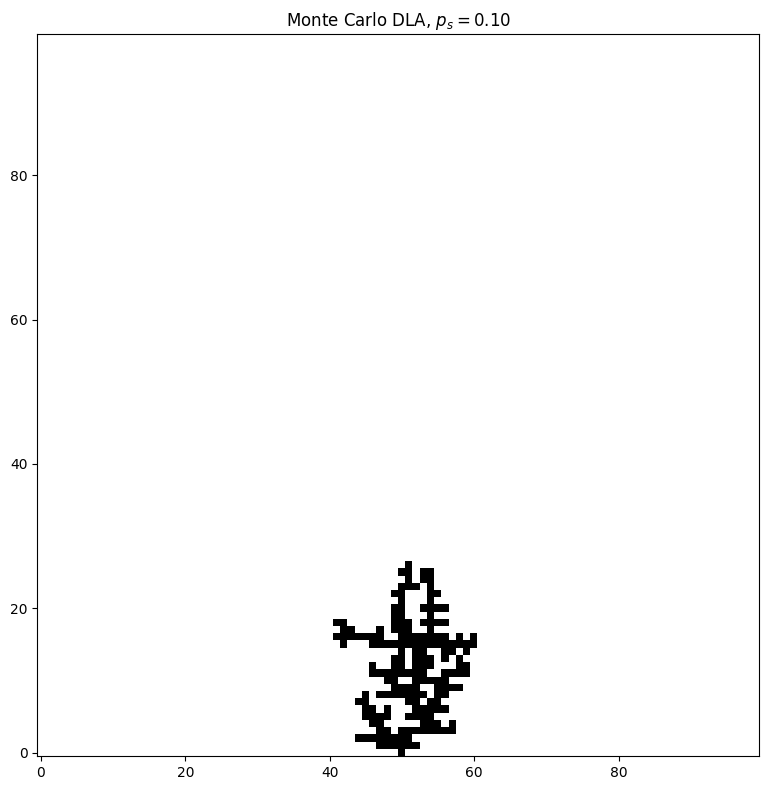

100%|██████████| 10000/10000 [00:04<00:00, 2140.80it/s]


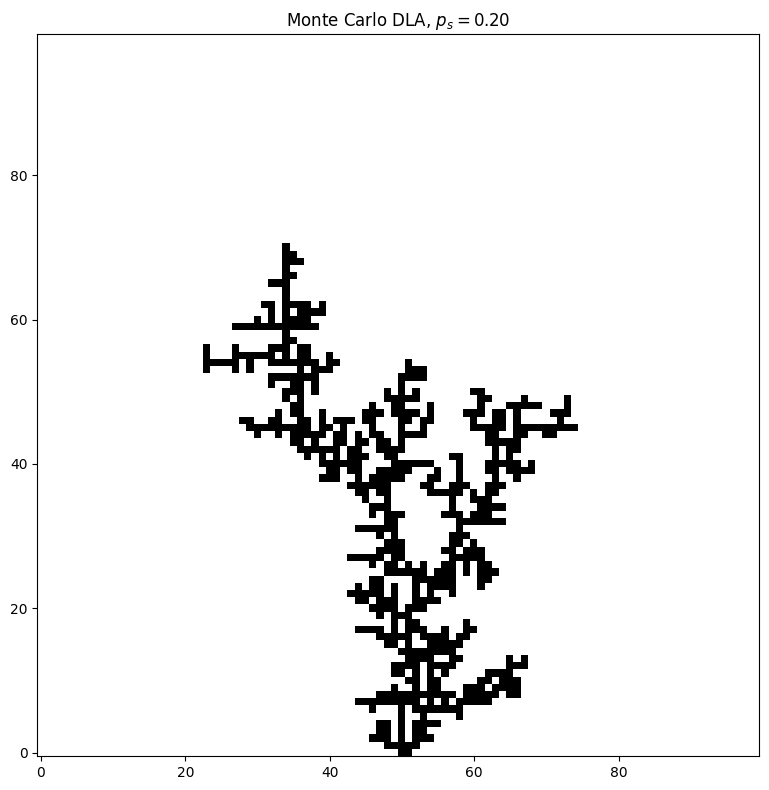

100%|██████████| 10000/10000 [00:04<00:00, 2273.54it/s]


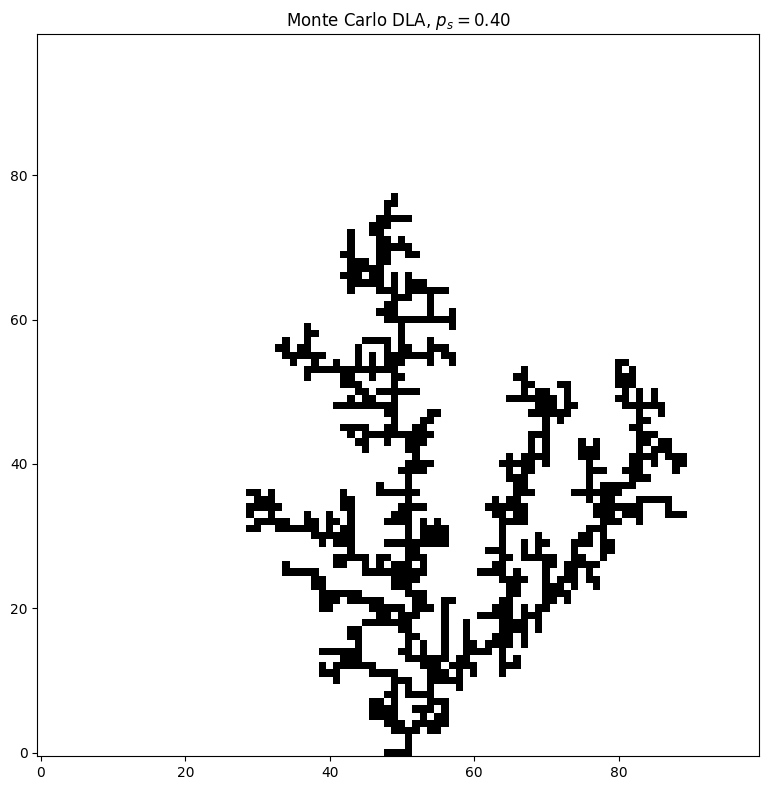

100%|██████████| 10000/10000 [00:02<00:00, 3502.91it/s]


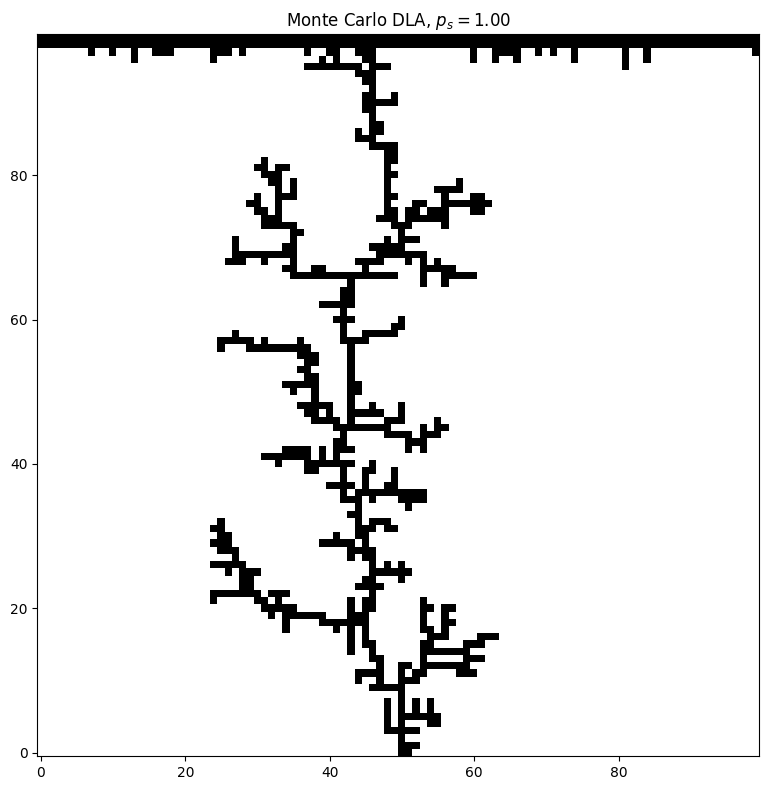

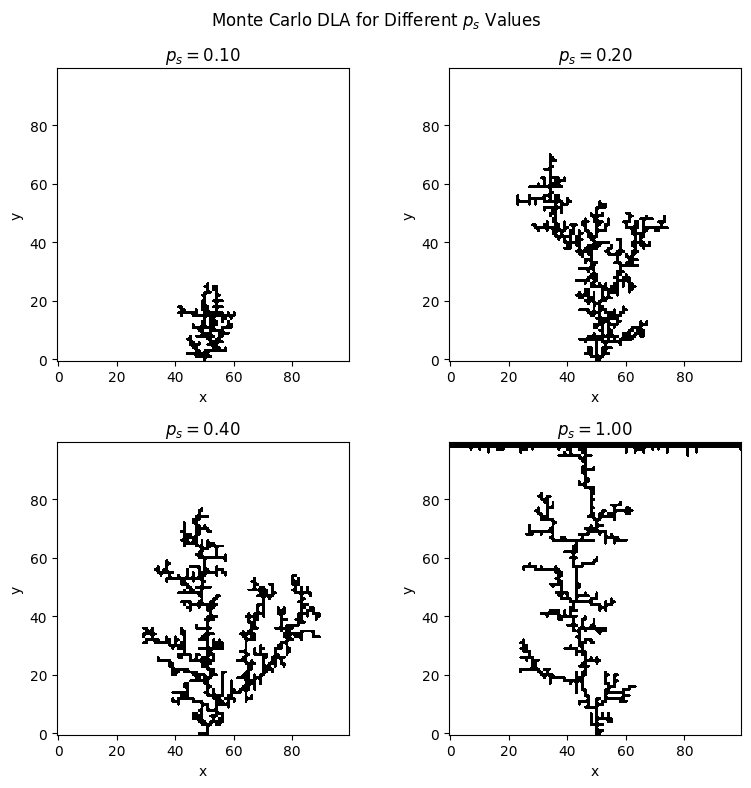

In [ ]:
from mca import monte_carlo_dla, plot_grid, plot_comparison, create_animation
from matplotlib import colors

results = []

# Parameters
size = 100
num_walkers = 10000
ps_values = [0.1, 0.2, 0.4, 1.0]
animation = False # Set this parameter to True to create an animation

for ps in ps_values:
    grid, history = monte_carlo_dla(size, num_walkers, ps)
    plot_grid(grid, title=r"Monte Carlo DLA, $p_s = %.2f$" % ps, filename=f"images/mca/mca_{ps}.pdf",
                savefig=False, cmap=colors.ListedColormap(['white', 'black']), colorbar=False)
    results.append(grid)

    if animation:
        ani = create_animation(history, ps)
        ani.save(f'images/mca/dla_animation_ps_{ps}.mp4', writer='ffmpeg', fps=10, dpi=600)
        plt.show()

plot_comparison(results, title="Monte Carlo DLA for Different $p_s$ Values", sub_titles=[r"$p_s = %.2f$" % ps for ps in ps_values], savefig=savefig,
                filename="images/mca/mca_comparison.pdf", cmap=colors.ListedColormap(['white', 'black']), colorbar=False)

## 2.3 Gray-Scott Model

In [ ]:
from gs import gray_scott_simulation

size = 100
T = 200000
dt = 1 
dx = 1.5
save_interval = 0 # Set to a positive value to create an animation
steps = int(T / dt)

# Run simulations with different parameters

# Mixed dots and waves (default)
U1, V1 = gray_scott_simulation(size=size, Du=0.16, Dv=0.08, f=0.035, k=0.060, 
                                steps=steps, dt=dt, dx=dx, save_interval=0)

# Sparse spots
U2, V2 = gray_scott_simulation(size=size, Du=0.16, Dv=0.08, f=0.022, k=0.051, 
                                steps=steps, dt=dt, dx=dx, save_interval=0)

# Dense labyrinth-like waves
U3, V3 = gray_scott_simulation(size=size, Du=0.16, Dv=0.08, f=0.060, k=0.062, 
                                steps=steps, dt=dt, dx=dx, save_interval=0)

# Very fine, complex structures
U4, V4 = gray_scott_simulation(size=size, Du=0.16, Dv=0.08, f=0.025, k=0.055, 
                                                steps=steps, dt=dt, dx=dx, save_interval=save_interval)

# Create comparison plot
results = [(U1 - V1), (U2 - V2), (U3 - V3), (U4 - V4)]

plot_comparison(results, title="Gray-Scott Model Simulation",
                sub_titles=["Mixed dots and waves", "Sparse spots", 
                            "Dense labyrinth-like waves", "Very fine, complex structures"],
                savefig=savefig, filename="images/gs/gs_comparison.pdf", 
                cmap='magma', colorbar=True)

plt.show()

Simulating Gray-Scott Model with f = 0.035, k = 0.06: 100%|██████████| 200000/200000 [00:26<00:00, 7587.64it/s]
Simulating Gray-Scott Model with f = 0.022, k = 0.051: 100%|██████████| 200000/200000 [00:27<00:00, 7256.29it/s]
Simulating Gray-Scott Model with f = 0.06, k = 0.062: 100%|██████████| 200000/200000 [00:28<00:00, 7050.22it/s]
Simulating Gray-Scott Model with f = 0.025, k = 0.055: 100%|██████████| 200000/200000 [00:28<00:00, 6993.03it/s]
